<a href="https://colab.research.google.com/github/Smarth2005/Hugging-Face-Projects/blob/main/Object%20Detection%20using%20Hugging%20Face.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Object Detection using Hugging Face

In [ ]:
from transformers import pipeline
from PIL import Image, ImageDraw, ImageFont
import requests
from io import BytesIO

# Load object detection pipeline once
detector = pipeline("object-detection", model="facebook/detr-resnet-50")

def detect_objects(input_path=None, url=None, show_image=True, display_size=(400,400)):
    """
    Detect objects in an image using Hugging Face DETR and draw bounding boxes.

    Parameters:
        input_path (str): local path to image
        url (str): direct image URL
        show_image (bool): whether to display the image
        display_size (tuple): (width, height) to resize image for display
    """
    # Load image
    if url:
        response = requests.get(url)
        img = Image.open(BytesIO(response.content))
    elif input_path:
        img = Image.open(input_path)
    else:
        raise ValueError("Please provide either input_path or url")

    # Run object detection
    results = detector(img)

    # Draw bounding boxes
    draw = ImageDraw.Draw(img)
    for obj in results:
        box = obj['box']
        label = obj['label']
        score = obj['score']

        x0, y0 = box['xmin'], box['ymin']
        x1, y1 = box['xmax'], box['ymax']

        draw.rectangle([x0, y0, x1, y1], outline="red", width=3)
        text = f"{label} ({score:.2f})"
        draw.text((x0, y0 - 10), text, fill="red")

    # Resize image for display
    if show_image:
        img_display = img.copy()
        img_display.thumbnail(display_size)
        try:
            from IPython.display import display
            display(img_display)
        except ImportError:
            img_display.show()

    # Print detected objects
    print("Detected objects:")
    for obj in results:
        print(f"{obj['label']}: {obj['score']:.4f}")


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/102M [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/torch/nn/modules/module.py:2397: UserWarning: for conv1.weight: copying from a non-meta parameter in the checkpoint to a meta parameter in the current model, which is a no-op. (Did you mean to pass `assign=True` to assign items in the state dictionary to their corresponding key in the module instead of copying them in place?)
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/nn/modules/module.py:2397: UserWarning: for bn1.weight: copying from a non-meta parameter in the checkpoint to a meta parameter in the current model, which is a no-op. (Did you mean to pass `assign=True` to assign items in the state dictionary to their corresponding key in the module instead of copying them in place?)
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/nn/modules/module.py:2397: UserWarning: for bn1.bias: copying from a non-meta parameter in the checkpoint to a meta parameter in the current model, which is a no-op. (Did you mean to pas

preprocessor_config.json:   0%|          | 0.00/290 [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.
Device set to use cpu


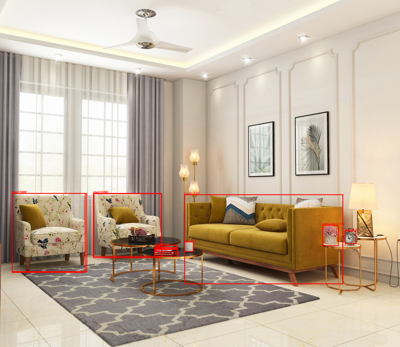

Detected objects:
book: 0.7697
book: 0.8585
book: 0.9654
clock: 0.9827
chair: 0.9968
couch: 0.9314
cup: 0.9729
couch: 0.8938
chair: 0.9965
book: 0.7226
potted plant: 0.9613
couch: 0.9981


In [ ]:
detect_objects(url="https://images.woodenstreet.de/image/data%2FLooks%2Fberlin1.jpg")

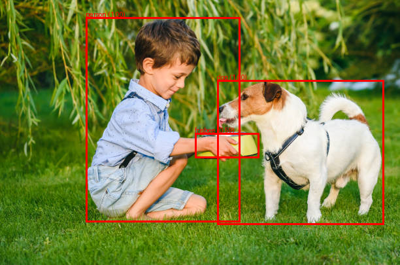

Detected objects:
person: 0.9994
frisbee: 0.5904
dog: 0.9997


In [ ]:
detect_objects(url="https://media.istockphoto.com/id/1136222023/photo/small-boy-holding-dog-bowl-in-hands-to-water-his-thirsty-pet-dog.jpg?s=612x612&w=0&k=20&c=r8iGQuBdMjpM4XelAWbt5DGX3gzqiDz7tkuNZuG4dGI=")

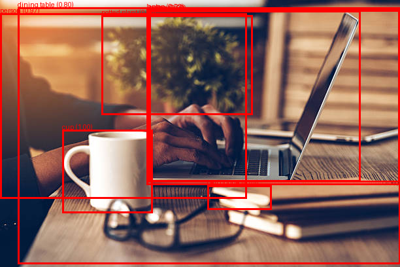

Detected objects:
potted plant: 0.9368
cup: 0.9955
cell phone: 0.5378
dining table: 0.8019
person: 0.9665
laptop: 0.7275
laptop: 0.9921
laptop: 0.5231


In [ ]:
detect_objects(url="https://media.istockphoto.com/id/516722846/photo/working-moments.jpg?s=612x612&w=0&k=20&c=SA2GaRxs6ac0Ghsx0wMMeB158WFm6iXN3XsLAt3sJK4=")

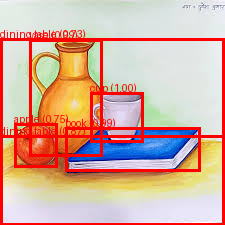

Detected objects:
apple: 0.7535
dining table: 0.7330
vase: 0.9852
dining table: 0.8650
cup: 0.9975
book: 0.9903


In [ ]:
detect_objects(url="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQm3WoWgDZ2KE1sHEI5a0m-6n9v2KuUqhvY7Q&s")

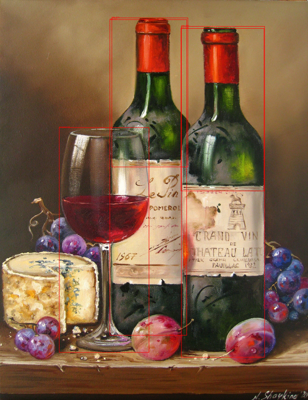

Detected objects:
bottle: 0.6968
wine glass: 0.9969
bottle: 0.8662
bottle: 0.9001
bottle: 0.9913


In [ ]:
detect_objects(url="https://i.etsystatic.com/12258042/r/il/6758a1/5864367326/il_fullxfull.5864367326_smod.jpg")

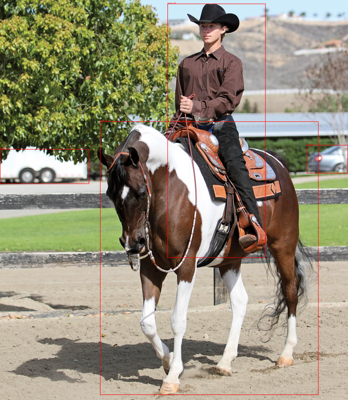

Detected objects:
car: 0.9977
truck: 0.9964
person: 0.9983
horse: 0.9994


In [ ]:
detect_objects(url="https://horseandrider.com/wp-content/uploads/migrations/horseandrider/Horse-rider-driver-blogmay119.jpg")